# MSCS 634 Project Deliverable 2: Regression Modeling and Performance Evaluation

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='target')
X.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [2]:

# Feature engineering
X['bmi_squared'] = X['bmi'] ** 2
X['age_bmi_interaction'] = X['age'] * X['bmi']
X.describe()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,bmi_squared,age_bmi_interaction
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,2.262443e-03,0.000419
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,3.267015e-03,0.002266
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,6.807836e-08,-0.007899
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,2.530092e-04,-0.000677
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,1.133877e-03,0.000093
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,3.217685e-03,0.001319
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,2.908909e-02,0.008520


## Data Splitting and Scaling

In [3]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Model 1: Linear Regression

In [4]:

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
cv_scores_lr = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='r2')

print("Linear Regression:")
print(f"MSE: {mse_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R-squared: {r2_lr:.3f}")
print(f"CV Mean R2: {cv_scores_lr.mean():.3f}")


Linear Regression:
MSE: 2864.41
RMSE: 53.52
R-squared: 0.459
CV Mean R2: 0.443


## Model 2: Ridge Regression

## Visualizations: Feature Relationships

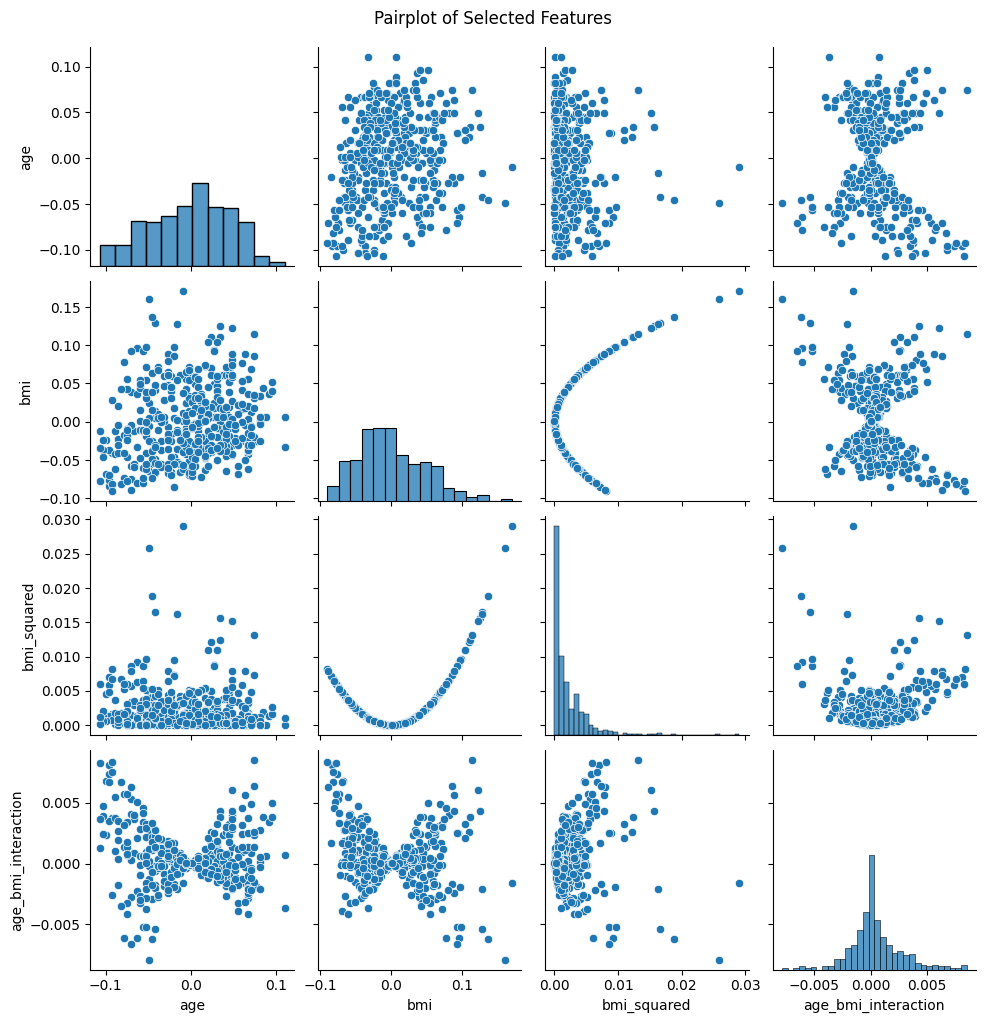

In [5]:
# Visualize feature relationships using a pairplot
sns.pairplot(X[['age', 'bmi', 'bmi_squared', 'age_bmi_interaction']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

## Visualizations: Residual Plot for Linear Regression

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


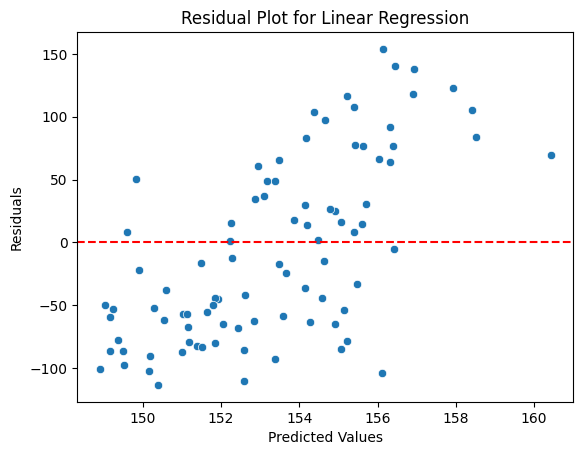

In [6]:
# Visualize residuals of linear regression
y_pred_lr = lr.predict(X_test)
residuals = y_test - y_pred_lr
sns.scatterplot(x=y_pred_lr, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linear Regression')
plt.show()

## Visualizations: Feature Relationships

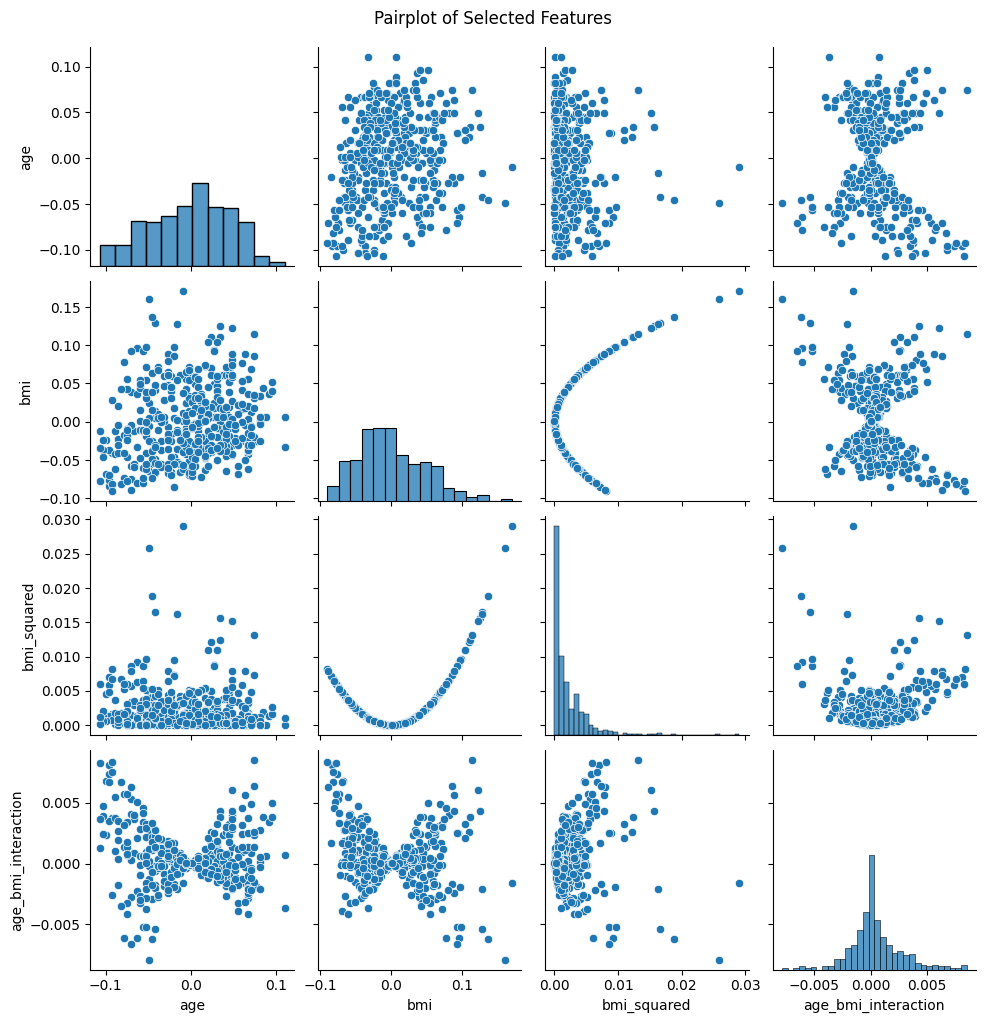

In [7]:
# Visualize feature relationships using a pairplot
sns.pairplot(X[['age', 'bmi', 'bmi_squared', 'age_bmi_interaction']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

## Visualizations: Residual Plot for Linear Regression

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


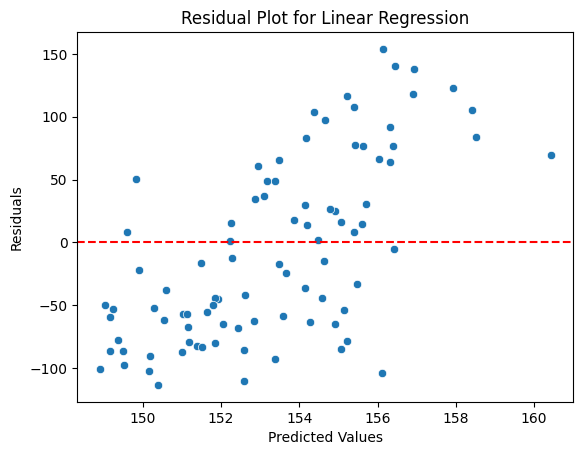

In [8]:
# Visualize residuals of linear regression
y_pred_lr = lr.predict(X_test)
residuals = y_test - y_pred_lr
sns.scatterplot(x=y_pred_lr, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linear Regression')
plt.show()

In [9]:

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
cv_scores_ridge = cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='r2')

print("Ridge Regression:")
print(f"MSE: {mse_ridge:.2f}")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"R-squared: {r2_ridge:.3f}")
print(f"CV Mean R2: {cv_scores_ridge.mean():.3f}")


Ridge Regression:
MSE: 2858.06
RMSE: 53.46
R-squared: 0.461
CV Mean R2: 0.445


## Model Comparison

In [10]:

results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression'],
    'MSE': [mse_lr, mse_ridge],
    'RMSE': [rmse_lr, rmse_ridge],
    'R-squared': [r2_lr, r2_ridge],
    'CV Mean R2': [cv_scores_lr.mean(), cv_scores_ridge.mean()]
})
results


,Model,MSE,RMSE,R-squared,CV Mean R2
0,Linear Regression,2864.407015,53.520155,0.459357,0.443071
1,Ridge Regression,2858.057374,53.460802,0.460556,0.444983
